C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1468 - accuracy: 0.9536 - val_loss: 0.0527 - val_accuracy: 0.9822
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0343 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0315 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0257 - val_accuracy: 0.9924


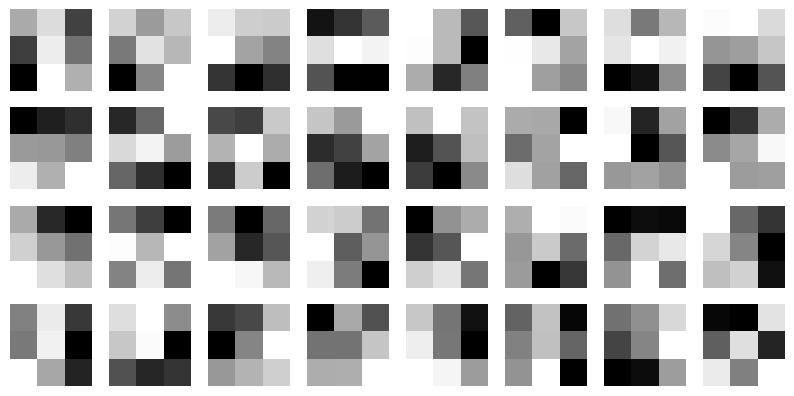

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Get the filters of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Plot the filters
n_filters = filters.shape[3]
plt.figure(figsize=(10, 10))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    plt.subplot(8, 8, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')

plt.show()